In [25]:
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
data = pd.read_csv("C:\\Users\\Asus\\Desktop\\FİNALÖDEVİ\\VeriSeti.csv", header=0, names=column_names)

In [26]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)


In [27]:
data.fillna(data.median(), inplace=True)



In [28]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[82 18]
 [27 27]]


In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC: {:.2f}".format(roc_auc))

ROC AUC: 0.81


In [35]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

In [36]:
print("Precision: {:.2f}".format(precision))
print("Recall (Sensitivity): {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Specificity: {:.2f}".format(specificity))

Precision: 0.60
Recall (Sensitivity): 0.50
F1 Score: 0.55
Specificity: 0.82


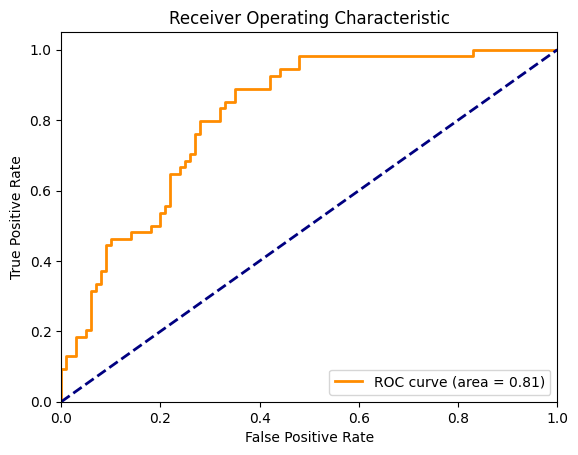

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()